In [1]:
import meep as mp
import numpy as np
import matplotlib.pyplot as plt

Using MPI version 4.0, 1 processes


/home/gridsan/mcomella/.conda/envs/pmp/lib/python3.10/site-packages/numpy/core/getlimits.py:500: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/gridsan/mcomella/.conda/envs/pmp/lib/python3.10/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_subnormal)


     block, center = (0,0,0)
          size (0.45,0.45,0.45)
          axes (1,0,0), (0,1,0), (0,0,1)


<AxesSubplot:xlabel='X', ylabel='Y'>

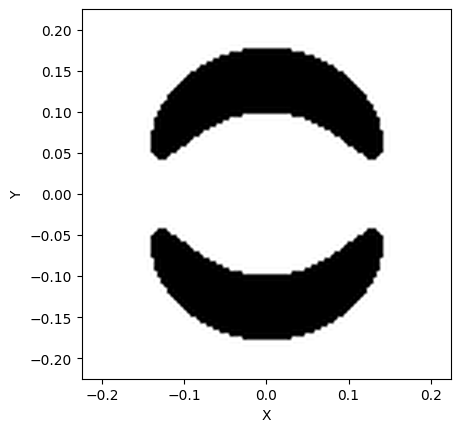

In [2]:
sxy = 0.45
R = 0.14
r = 0.04
P = 0.1 # Frequency of turns
h = 0.32 # Height of spring

def spring(p):
    if p.z > h/2 or p.z < -h/2:
        return mp.air
    if p.y == 0:
        if p.x < 0:
            if (R-np.sqrt(p.x**2+p.y**2))**2 + (p.z - P/2)**2 < r**2:
                return mp.Medium(epsilon=12)
            elif (R-np.sqrt(p.x**2+p.y**2))**2 + (p.z - P/2 + P)**2 < r**2:
                return mp.Medium(epsilon=12)
            elif (R-np.sqrt(p.x**2+p.y**2))**2 + (p.z - P/2 - P)**2 < r**2:
                return mp.Medium(epsilon=12)
            else:
                return mp.air
        else:
            if (R-np.sqrt(p.x**2+p.y**2))**2 + (p.z + P/2)**2 < r**2:
                return mp.Medium(epsilon=12)
            elif (R-np.sqrt(p.x**2+p.y**2))**2 + (p.z + P/2 + P)**2 < r**2:
                return mp.Medium(epsilon=12)
            elif (R-np.sqrt(p.x**2+p.y**2))**2 + (p.z + P/2 - P)**2 < r**2:
                return mp.Medium(epsilon=12)
            else:
                return mp.air

    if (R-np.sqrt(p.x**2+p.y**2))**2 + (p.z + P*np.arctan(p.x/p.y)/np.pi)**2 < r**2:
        return mp.Medium(epsilon=12)
    elif (R-np.sqrt(p.x**2+p.y**2))**2 + (p.z + P*np.arctan(p.x/p.y)/np.pi - P)**2 < r**2:
        return mp.Medium(epsilon=12)
    elif (R-np.sqrt(p.x**2+p.y**2))**2 + (p.z + P*np.arctan(p.x/p.y)/np.pi + P)**2 < r**2:
        return mp.Medium(epsilon=12)
    else:
        return mp.air

geometry = [mp.Block(center=mp.Vector3(),
                     size=mp.Vector3(sxy,sxy,sxy),
                     material=spring)]

sim = mp.Simulation(cell_size=mp.Vector3(sxy,sxy,sxy),
                    geometry=geometry,
                    resolution=250)

sim.plot2D(output_plane=mp.Volume(center=mp.Vector3(), size=mp.Vector3(sxy,sxy,0)))

     block, center = (0,0,0)
          size (0.45,0.45,0.45)
          axes (1,0,0), (0,1,0), (0,0,1)


<AxesSubplot:xlabel='Y', ylabel='Z'>

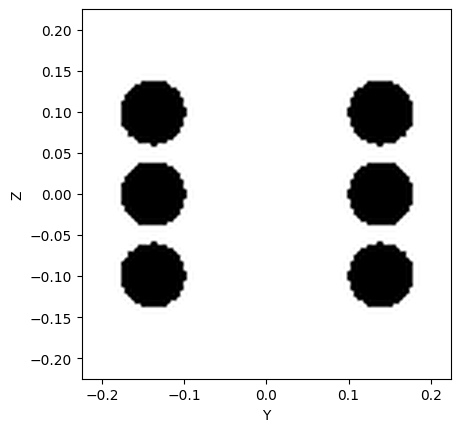

In [3]:
sim.plot2D(output_plane=mp.Volume(center=mp.Vector3(), size=mp.Vector3(0,sxy,sxy)))

     block, center = (0,0,0)
          size (0.45,0.45,0.45)
          axes (1,0,0), (0,1,0), (0,0,1)


<AxesSubplot:xlabel='X', ylabel='Z'>

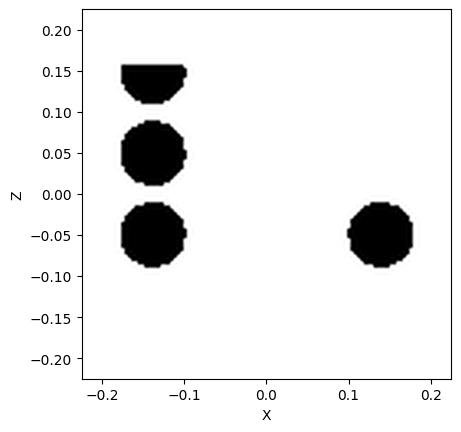

In [70]:
sim.plot2D(output_plane=mp.Volume(center=mp.Vector3(y=0), size=mp.Vector3(sxy,0,sxy)))

/home/gridsan/mcomella/.conda/envs/pmp/lib/python3.10/site-packages/meep/source.py:504: RuntimeWarning: EigenModeSource component is not ALL_COMPONENTS (the default), which makes it non-unidirectional.
  warnings.warn("EigenModeSource component is not ALL_COMPONENTS (the default), which makes it non-unidirectional.",RuntimeWarning)


     block, center = (0,0,-3.44583)
          size (1e+20,1e+20,6.89167)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (0.45,0.45,0.45)
          axes (1,0,0), (0,1,0), (0,0,1)


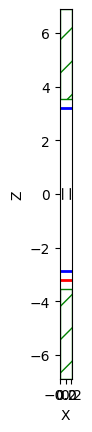

In [26]:
import sys, os
sys.path.append('../../..')
from meep_metamaterials import metamaterials as mm

sim = mm.MetamaterialSimulation(period=sxy,
                                geometry=geometry,
                                freq_range=np.linspace(0.3,0.8,50),
                                resolution=25)

sim.plot2D(plane='xz')

In [ ]:
sim.run()

-----------
Initializing structure...
time for choose_chunkdivision = 0.000158072 s
Working in 3D dimensions.
Computational cell is 10 x 10 x 23.32 with resolution 25
     block, center = (0,0,-5.83333)
          size (1e+20,1e+20,11.6667)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (10,10,10)
          axes (1,0,0), (0,1,0), (0,0,1)
subpixel-averaging is 54.9011% done, 3.28687 s remaining
subpixel-averaging is 38.2067% done, 6.47185 s remaining
subpixel-averaging is 77.7579% done, 1.14419 s remaining
subpixel-averaging is 1.28584% done, 307.626 s remaining
subpixel-averaging is 2.65945% done, 146.632 s remaining
subpixel-averaging is 4.04831% done, 94.938 s remaining
subpixel-averaging is 5.31127% done, 71.3911 s remaining
subpixel-averaging is 6.8146% done, 54.7771 s remaining
subpixel-averaging is 8.08137% done, 45.6212 s remaining
subpixel-averaging is 9.55799% done, 37.8756 s remainin

subpixel-averaging is 80.2376% done, 0.988146 s remaining
subpixel-averaging is 81.5196% done, 0.906805 s remaining
subpixel-averaging is 82.9237% done, 0.824319 s remaining
subpixel-averaging is 84.2935% done, 0.747507 s remaining
subpixel-averaging is 85.5603% done, 0.676027 s remaining
subpixel-averaging is 87.2163% done, 0.587224 s remaining
subpixel-averaging is 88.4868% done, 0.521085 s remaining
subpixel-averaging is 90.0169% done, 0.44396 s remaining
subpixel-averaging is 91.3027% done, 0.381921 s remaining
subpixel-averaging is 92.7755% done, 0.31182 s remaining
subpixel-averaging is 94.214% done, 0.24614 s remaining
subpixel-averaging is 95.4693% done, 0.189937 s remaining
subpixel-averaging is 97.0452% done, 0.121823 s remaining
subpixel-averaging is 98.3157% done, 0.0686741 s remaining
subpixel-averaging is 99.861% done, 0.00557938 s remaining
subpixel-averaging is 55.2559% done, 3.24003 s remaining
subpixel-averaging is 42.8751% done, 5.32977 s remaining
subpixel-averaging

on time step 321 (time=6.42), 0.877693 s/step
on time step 326 (time=6.52), 0.982216 s/step
on time step 331 (time=6.62), 0.877364 s/step
on time step 336 (time=6.72), 0.936722 s/step
on time step 341 (time=6.82), 0.86186 s/step
on time step 346 (time=6.92), 0.938137 s/step
on time step 351 (time=7.02), 0.905907 s/step
on time step 356 (time=7.12), 0.937313 s/step
on time step 361 (time=7.22), 0.913125 s/step
on time step 366 (time=7.32), 0.879607 s/step
on time step 371 (time=7.42), 0.936519 s/step
on time step 376 (time=7.52), 0.856599 s/step
on time step 381 (time=7.62), 0.967949 s/step
on time step 386 (time=7.72), 0.859314 s/step
on time step 391 (time=7.82), 0.939262 s/step
on time step 396 (time=7.92), 0.865487 s/step
on time step 401 (time=8.02), 0.925532 s/step
on time step 406 (time=8.12), 0.923051 s/step
on time step 411 (time=8.22), 0.900579 s/step
on time step 416 (time=8.32), 0.953878 s/step
on time step 421 (time=8.42), 0.878012 s/step
on time step 426 (time=8.52), 0.948

on time step 1196 (time=23.92), 0.900562 s/step
on time step 1201 (time=24.02), 0.881511 s/step
on time step 1206 (time=24.12), 0.939304 s/step
on time step 1211 (time=24.22), 0.85323 s/step
on time step 1216 (time=24.32), 0.968183 s/step
on time step 1221 (time=24.42), 0.851529 s/step
on time step 1226 (time=24.52), 0.940048 s/step
on time step 1231 (time=24.62), 0.906219 s/step
on time step 1236 (time=24.72), 0.901415 s/step
on time step 1241 (time=24.82), 0.936243 s/step
on time step 1246 (time=24.92), 0.873536 s/step
on time step 1251 (time=25.02), 0.936449 s/step
on time step 1256 (time=25.12), 0.850411 s/step
on time step 1261 (time=25.22), 0.941574 s/step
on time step 1266 (time=25.32), 0.889786 s/step
on time step 1271 (time=25.42), 0.941625 s/step
on time step 1276 (time=25.52), 0.929715 s/step
on time step 1281 (time=25.62), 0.8828 s/step
on time step 1286 (time=25.72), 0.937142 s/step
on time step 1291 (time=25.82), 0.85258 s/step
on time step 1296 (time=25.92), 0.971273 s/s

on time step 2051 (time=41.02), 0.947474 s/step
on time step 2056 (time=41.12), 0.89019 s/step
on time step 2061 (time=41.22), 0.942838 s/step
on time step 2066 (time=41.32), 0.862759 s/step
on time step 2071 (time=41.42), 0.94536 s/step
on time step 2076 (time=41.52), 0.92233 s/step
on time step 2081 (time=41.62), 0.920819 s/step
on time step 2086 (time=41.72), 0.953082 s/step
on time step 2091 (time=41.82), 0.85096 s/step
on time step 2096 (time=41.92), 0.938718 s/step
on time step 2101 (time=42.02), 0.855178 s/step
on time step 2106 (time=42.12), 0.950797 s/step
on time step 2111 (time=42.22), 0.905842 s/step
on time step 2116 (time=42.32), 0.899882 s/step
on time step 2121 (time=42.42), 0.948784 s/step
on time step 2126 (time=42.52), 0.903016 s/step
on time step 2131 (time=42.62), 0.931455 s/step
on time step 2136 (time=42.72), 0.880155 s/step
on time step 2141 (time=42.82), 0.938615 s/step
on time step 2146 (time=42.92), 0.88326 s/step
on time step 2151 (time=43.02), 0.919834 s/st

KeyboardInterrupt: 

---

In [31]:
import meep as mp
import numpy as np
import matplotlib.pyplot as plt

     block, center = (0,0,0)
          size (0.45,0.45,0.45)
          axes (1,0,0), (0,1,0), (0,0,1)


<AxesSubplot:xlabel='X', ylabel='Y'>

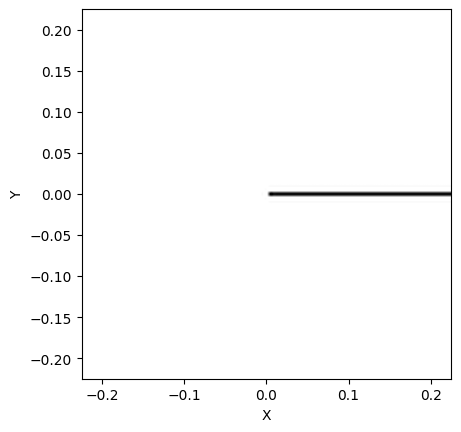

In [32]:
sxy = 0.45
R = 0.32/2
a = .02
P = 100 # Frequency of turns
h = 0.32 # Height of spring

def spring(p):
    # Convert to cylindrical coordinates
    r = np.sqrt(p.x**2+p.y**2)
    phi = np.arctan2(p.y,p.x)
    z = p.z

    if (r-R*phi)**2 + (z-P*phi)**2 < a**2:
        return mp.Medium(epsilon=2)
    else:
        return mp.air


geometry = [mp.Block(center=mp.Vector3(),
                     size=mp.Vector3(sxy,sxy,sxy),
                     material=spring)]

sim = mp.Simulation(cell_size=mp.Vector3(sxy,sxy,sxy),
                    geometry=geometry,
                    resolution=250)

sim.plot2D(output_plane=mp.Volume(center=mp.Vector3(), size=mp.Vector3(sxy,sxy,0)))

     block, center = (0,0,0)
          size (0.45,0.45,0.45)
          axes (1,0,0), (0,1,0), (0,0,1)


<AxesSubplot:xlabel='X', ylabel='Z'>

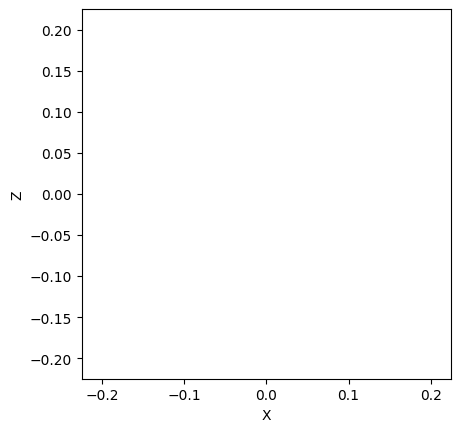

In [33]:
sim.plot2D(output_plane=mp.Volume(center=mp.Vector3(), size=mp.Vector3(sxy,0,sxy)))


---

In [2]:
import meep as mp
import numpy as np
import matplotlib.pyplot as plt
import sys, os
sys.path.append('../../..')
from meep_metamaterials import metamaterials as mm
from meep_metamaterials.retrieval import retrieval
from meep_metamaterials import geometries as geom
from meep.materials import Ag

sxy = 0.45
R = 0.14
r = 0.04
P = 0.1 # Frequency of turns
h = 0.32 # Height of spring

spring = geom.spring(R, r, P, h, Ag, axis='x')

geometry = [mp.Block(center=mp.Vector3(), size=mp.Vector3(sxy, sxy, sxy), material=spring)]

sim = mm.MetamaterialSimulation(period=sxy,
                                geometry=geometry,
                                freq_range=np.linspace(0.2, 1, 50),
                                resolution=100,
                                pol=mp.Hx)

/home/gridsan/mcomella/.conda/envs/pmp/lib/python3.10/site-packages/meep/source.py:504: RuntimeWarning: EigenModeSource component is not ALL_COMPONENTS (the default), which makes it non-unidirectional.
  warnings.warn("EigenModeSource component is not ALL_COMPONENTS (the default), which makes it non-unidirectional.",RuntimeWarning)


     block, center = (0,0,-5.1125)
          size (1e+20,1e+20,10.225)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (0.45,0.45,0.45)
          axes (1,0,0), (0,1,0), (0,0,1)


/home/gridsan/mcomella/.conda/envs/pmp/lib/python3.10/site-packages/numpy/core/getlimits.py:500: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/gridsan/mcomella/.conda/envs/pmp/lib/python3.10/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_subnormal)


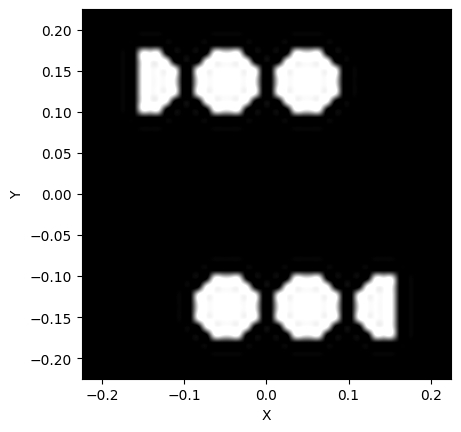

In [4]:
sim.plot2D()